# Special Assignment
# Subject: PSC
# Prepared By: 22BEC025,22BEC030,22BEC049

# Data Reading

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv('project.csv')
print(df)

       Employee ID  Age  Gender  Years at Company    Job Role  Monthly Income  \
0            52685   36    Male                13  Healthcare            8029   
1            30585   35    Male                 7   Education            4563   
2            54656   50    Male                 7   Education            5583   
3            33442   58    Male                44       Media            5525   
4            15667   39    Male                24   Education            4604   
...            ...  ...     ...               ...         ...             ...   
14895        16243   56  Female                42  Healthcare            7830   
14896        47175   30  Female                15   Education            3856   
14897        12409   52    Male                 5   Education            5654   
14898         9554   18    Male                 4   Education            5276   
14899        73042   59  Female                48   Education            3774   

      Work-Life Balance Job

In [13]:
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14900 entries, 0 to 14899
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Employee ID               14900 non-null  int64 
 1   Age                       14900 non-null  int64 
 2   Gender                    14900 non-null  object
 3   Years at Company          14900 non-null  int64 
 4   Job Role                  14900 non-null  object
 5   Monthly Income            14900 non-null  int64 
 6   Work-Life Balance         14900 non-null  object
 7   Job Satisfaction          14900 non-null  object
 8   Performance Rating        14900 non-null  object
 9   Number of Promotions      14900 non-null  int64 
 10  Overtime                  14900 non-null  object
 11  Distance from Home        14900 non-null  int64 
 12  Education Level           14900 non-null  object
 13  Marital Status            14900 non-null  object
 14  Number of Dependents  

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,52685,36,Male,13,Healthcare,8029,Excellent,High,Average,1,...,1,Mid,Large,22,No,No,No,Poor,Medium,Stayed
1,30585,35,Male,7,Education,4563,Good,High,Average,1,...,4,Entry,Medium,27,No,No,No,Good,High,Left
2,54656,50,Male,7,Education,5583,Fair,High,Average,3,...,2,Senior,Medium,76,No,No,Yes,Good,Low,Stayed
3,33442,58,Male,44,Media,5525,Fair,Very High,High,0,...,4,Entry,Medium,96,No,No,No,Poor,Low,Left
4,15667,39,Male,24,Education,4604,Good,High,Average,0,...,6,Mid,Large,45,Yes,No,No,Good,High,Stayed


# Data Pre-Processing

In [14]:
#Cleaning Data

#Check for Missing Values
df.isnull().any()

Employee ID                 False
Age                         False
Gender                      False
Years at Company            False
Job Role                    False
Monthly Income              False
Work-Life Balance           False
Job Satisfaction            False
Performance Rating          False
Number of Promotions        False
Overtime                    False
Distance from Home          False
Education Level             False
Marital Status              False
Number of Dependents        False
Job Level                   False
Company Size                False
Company Tenure              False
Remote Work                 False
Leadership Opportunities    False
Innovation Opportunities    False
Company Reputation          False
Employee Recognition        False
Attrition                   False
dtype: bool

In [15]:
#Summary for each variable
df.describe()

,Employee ID,Age,Years at Company,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Company Tenure
count,14900.000000,14900.000000,14900.000000,14900.000000,14900.000000,14900.000000,14900.000000,14900.000000
mean,37339.022081,38.385235,15.592416,7287.306040,0.834362,49.927315,1.659329,55.603624
std,21453.129293,12.097904,11.133792,2156.737934,0.996511,28.702307,1.545401,25.352807
min,5.000000,18.000000,1.000000,1226.000000,0.000000,1.000000,0.000000,2.000000
25%,18825.500000,28.000000,7.000000,5633.750000,0.000000,25.000000,0.000000,36.000000
50%,37433.000000,38.000000,13.000000,7332.000000,1.000000,50.000000,1.000000,56.000000
75%,55857.500000,49.000000,23.000000,8852.000000,2.000000,75.000000,3.000000,75.000000
max,74471.000000,59.000000,51.000000,15063.000000,4.000000,99.000000,6.000000,127.000000


In [17]:
#To get the unique values for department
df['Job Role'].unique()

array(['Healthcare', 'Education', 'Media', 'Technology', 'Finance'],
      dtype=object)

In [22]:
#Combine "technical","support" and "IT" into one department
df['Job Role']=np.where(df['Job Role'] =='support', 'technical', df['Job Role'])
df['Job Role']=np.where(df['Job Role'] =='IT', 'technical', df['Job Role'])

#After combining the department looks like 
df['Job Role'].unique()


array(['Healthcare', 'Education', 'Media', 'Technology', 'Finance'],
      dtype=object)

# Date Explorartion

In [37]:
#Now Let us find out how many employees left and stayed 
df['Attrition'].value_counts()

Attrition
Stayed    7868
Left      7032
Name: count, dtype: int64

In [38]:
#We will see the various observation of left employee by mean
def mean_by_attrition(df):
    grouped = df.groupby('Attrition')
    mean_values = {}
    
    for col in df.columns:
        try:
            mean_values[col] = grouped[col].mean()
        except TypeError:
            pass
            #print(f"Skipping non-numeric column: {col}")
    
    return pd.DataFrame(mean_values)

mean_values_df = mean_by_attrition(df)
print(mean_values_df)
#We Have used here try and except method as it was necessary because there are few columns which are not numeric

            Employee ID        Age  Years at Company  Monthly Income  \
Attrition                                                              
Left       37316.284556  37.636803         14.798493     7269.116468   
Stayed     37359.343671  39.054143         16.301983     7303.562913   

           Number of Promotions  Distance from Home  Number of Dependents  \
Attrition                                                                   
Left                   0.746303           52.566837              1.562002   
Stayed                 0.913066           47.568251              1.746314   

           Company Tenure  
Attrition                  
Left            54.968003  
Stayed          56.171708  


### Key Obseravtions of the employee left
-Age:Employees who left tend to be younger on average (37.6 years) compared to those who stayed (39.1 years).

-Years at Company:Employees who stayed have, on average, been with the company longer (16.3 years) than those who left (14.8 years).

-Monthly Income:The average monthly income of those who left is slightly lower (7269.12) compared to those who stayed (7303.56). The difference is relatively small.

-Number of Promotions:Employees who stayed received more promotions on average (0.91) compared to those who left (0.75). This could suggest that career advancement opportunities might influence retention.

-Distance from Home:Employees who left lived farther from the company (52.57 units) on average than those who stayed (47.57 units). A longer commute might be a factor for leaving the company.

-Number of Dependents:Those who stayed had slightly more dependents on average (1.75) compared to those who left (1.56).

-Company Tenure:On average, employees who stayed had a slightly longer company tenure (56.17) compared to those who left (54.97). However, the difference is not very large.

In [39]:
#We will see the various departments observation by mean
def mean_by_department(df):
    grouped = df.groupby('Job Role')
    mean_values_d = {}
    
    for col in df.columns:
        try:
            mean_values_d[col] = grouped[col].mean()
        except TypeError:
            pass
            #print(f"Skipping non-numeric column: {col}")
    
    return pd.DataFrame(mean_values_d)

mean_values_df_d = mean_by_department(df)
print(mean_values_df_d)
#We Have used here try and except method as it was necessary because there are few columns which are not numeric

             Employee ID        Age  Years at Company  Monthly Income  \
Job Role                                                                
Education   37451.649937  38.374369         15.779672     4489.901831   
Finance     37712.460010  38.271934         15.168202     8525.973340   
Healthcare  37346.356935  38.097319         15.255536     8004.900932   
Media       37437.785301  38.638315         15.811313     5994.212221   
Technology  36974.255308  38.553866         15.830406     9115.849541   

            Number of Promotions  Distance from Home  Number of Dependents  \
Job Role                                                                     
Education               0.836490           49.779987              1.681818   
Finance                 0.855550           49.551624              1.681047   
Healthcare              0.820513           49.959499              1.640443   
Media                   0.812139           50.174649              1.662263   
Technology          

In [41]:
#We will see the various Job level observation by mean
def mean_by_department(df):
    grouped = df.groupby('Job Level')
    mean_values_l = {}
    
    for col in df.columns:
        try:
            mean_values_l[col] = grouped[col].mean()
        except TypeError:
            pass
            #print(f"Skipping non-numeric column: {col}")
    
    return pd.DataFrame(mean_values_l)

mean_values_df_l = mean_by_department(df)
print(mean_values_df_l)
#We Have used here try and except method as it was necessary because there are few columns which are not numeric

            Employee ID        Age  Years at Company  Monthly Income  \
Job Level                                                              
Entry      37109.669034  38.202604         15.478099     7266.856249   
Mid        37750.901097  38.494852         15.797806     7282.992068   
Senior     36984.933703  38.525800         15.415741     7335.144024   

           Number of Promotions  Distance from Home  Number of Dependents  \
Job Level                                                                   
Entry                  0.831896           49.820058              1.651784   
Mid                    0.844726           50.056709              1.660928   
Senior                 0.819073           49.884063              1.670803   

           Company Tenure  
Job Level                  
Entry           55.470658  
Mid             55.973165  
Senior          55.145330  


In [43]:
#We will see the various companysize level observation by mean
def mean_by_department(df):
    grouped = df.groupby('Company Size')
    mean_values_c = {}
    
    for col in df.columns:
        try:
            mean_values_c[col] = grouped[col].mean()
        except TypeError:
            pass
            #print(f"Skipping non-numeric column: {col}")
    
    return pd.DataFrame(mean_values_c)

mean_values_df_c = mean_by_department(df)
print(mean_values_df_c)
#We Have used here try and except method as it was necessary because there are few columns which are not numeric

               Employee ID        Age  Years at Company  Monthly Income  \
Company Size                                                              
Large         38086.854709  38.315631         15.697729     7245.189379   
Medium        37142.613278  38.201710         15.399011     7285.810713   
Small         37165.109276  38.743213         15.848643     7318.367421   

              Number of Promotions  Distance from Home  Number of Dependents  \
Company Size                                                                   
Large                     0.822979           50.493988              1.697061   
Medium                    0.833155           49.942827              1.649613   
Small                     0.844118           49.517195              1.650226   

              Company Tenure  
Company Size                  
Large              55.403474  
Medium             55.861475  
Small              55.302489  


# Data Visualization

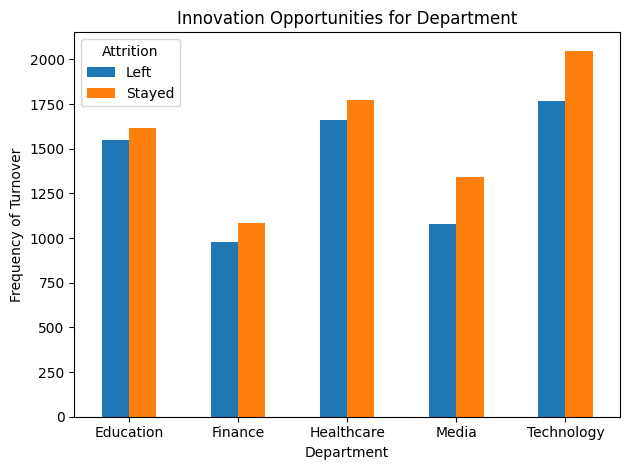

In [56]:
# Assuming 'left' column represents turnover (1 for "Left", 0 for "Stayed")
pd.crosstab(df['Job Role'],df['Attrition']).plot(kind='bar')

plt.title('Innovation Opportunities for Department')
plt.xlabel('Department')
plt.ylabel('Frequency of Turnover')
plt.xticks(rotation=0)  # Optional: To keep the x-axis labels horizontal for readability
plt.tight_layout()  # Ensures everything fits in the figure area
plt.savefig('department_bar_chart.png')  # Saves the plot as a PNG file
plt.show()

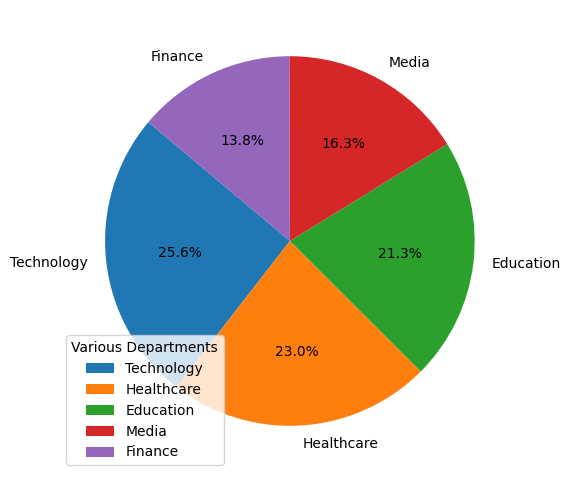

In [61]:
job_role_counts = df['Job Role'].value_counts()
plt.figure(figsize=(10, 6)) #For size of pie chart
plt.pie(job_role_counts, labels=job_role_counts.index, autopct='%1.1f%%', startangle=140)
plt.legend(title = "Various Departments")
plt.show() 

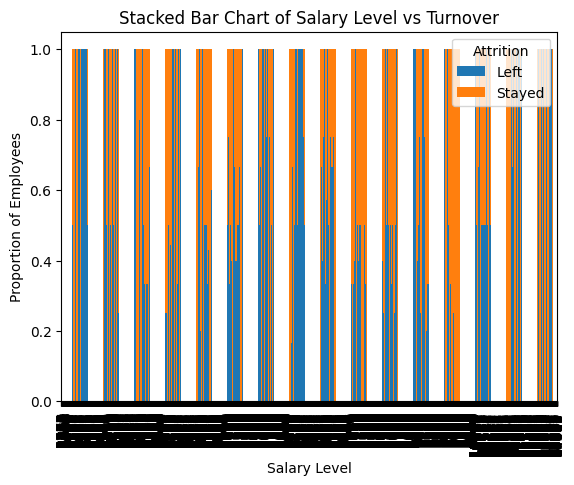

In [63]:
#Bar chart for employee salary level and the frequency of turnover
table=pd.crosstab(df['Monthly Income'] , df['Attrition'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Salary Level vs Turnover')
plt.xlabel('Salary Level')
plt.ylabel('Proportion of Employees')
plt.savefig('salary_bar_chart')

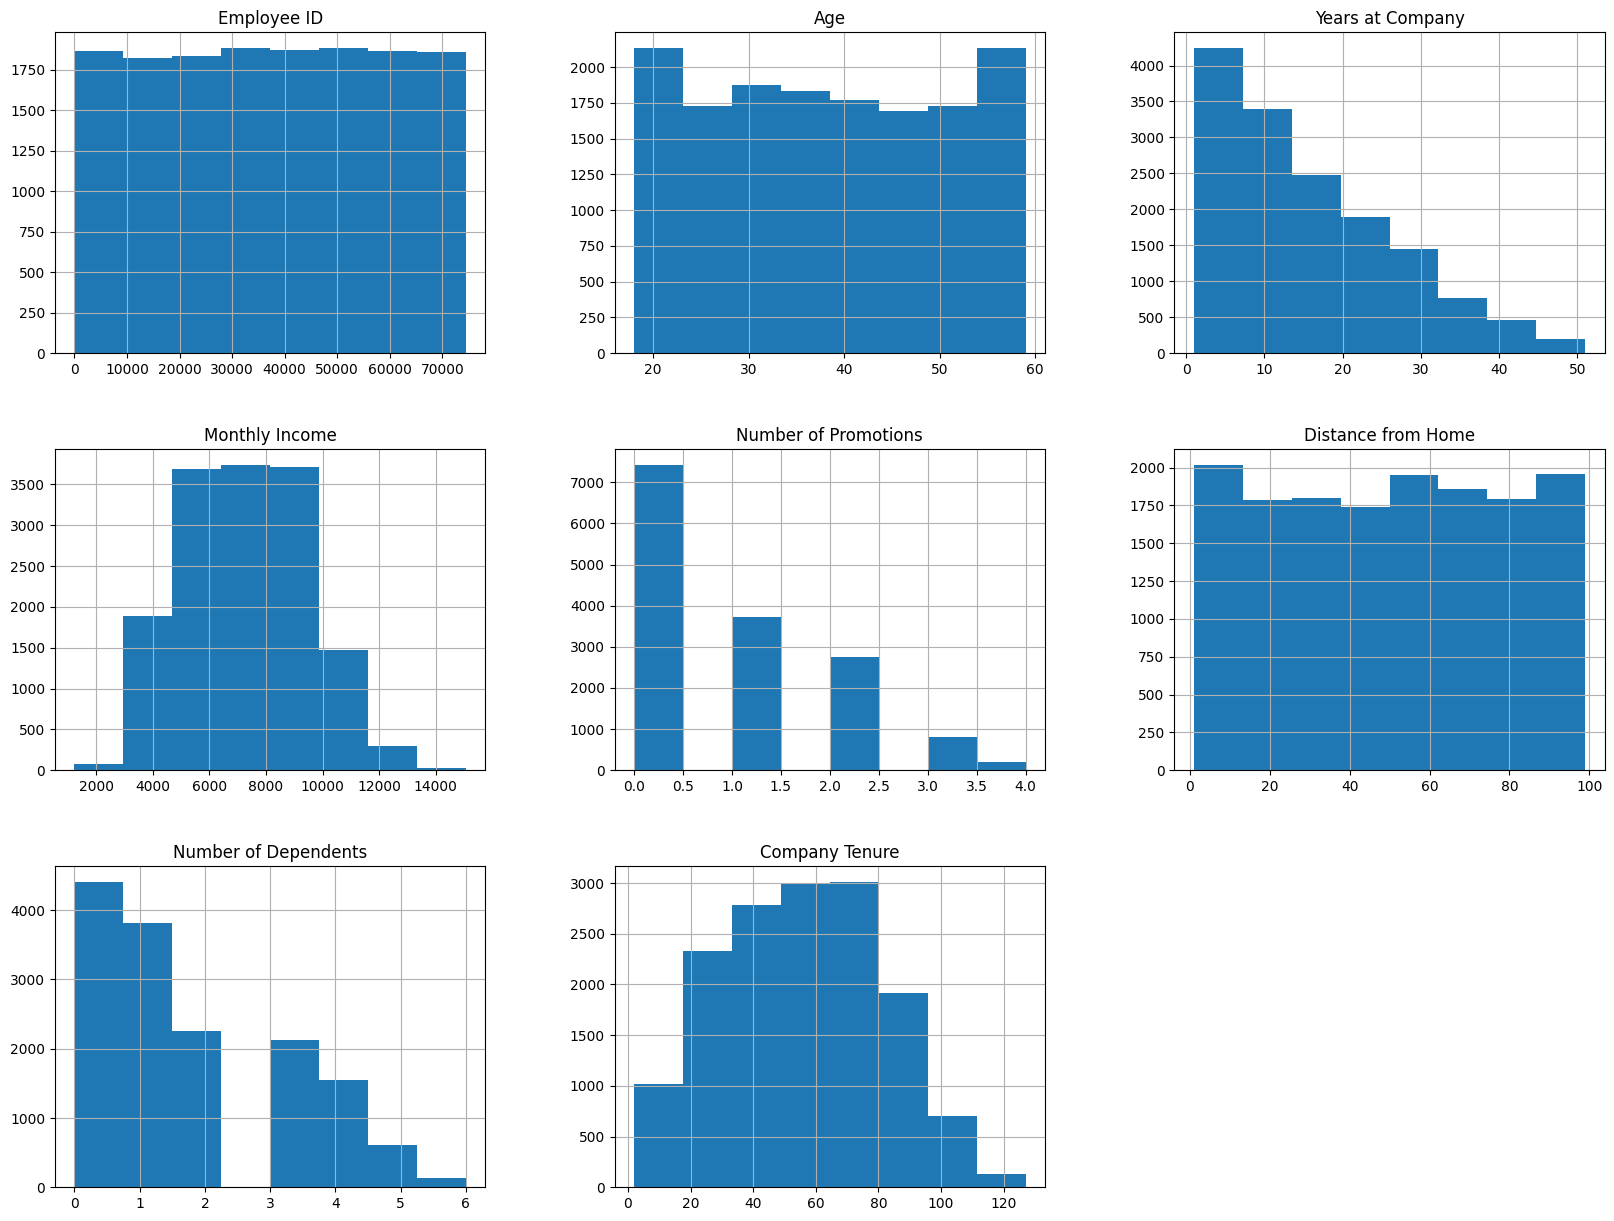

In [67]:
#Histogram of numeric variables
num_bins = 8

df.hist(bins=num_bins, figsize=(20,15))
plt.savefig("hr_histogram_plots")
plt.show()